# Practica 2: Procesamiento de datatasets

In [24]:
%%capture
!pip install spacy
!pip install nltk
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display, IFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/Users/jorgemagdaleno/PycharmProjects/pythonProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Analisis exploratorio

In [3]:
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


Columnas principales:

- Identificación del incidente (incident_id).
- Fecha (date).
- Estado y ciudad (state, city_or_county).
- Número de personas heridas y fallecidas (n_killed, n_injured).
- Participantes (participant_age, participant_gender, etc.).
- Fuentes del incidente (incident_url, source_url).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

Se detecto n_guns_involved es float, dado que uno esperaria que el valor fuera entero revisare porque es float.
Analizo primero si hay cualquier numero no entero

In [5]:
float_values = df['n_guns_involved'] % 1 != 0
float_sum =  float_values.sum()
print(float_sum)

99451


Se encuentra que hay 99451 no enteros
Revisare que estos no sean valores nulos

In [6]:
float_rows = df[(df['n_guns_involved'] % 1 != 0) & (df['n_guns_involved'].notna())]
float_rows[['n_guns_involved', 'n_killed', 'n_injured', 'state', 'city_or_county']].head()
float_rows.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district


Se ve que todos eran nulos, para limpiar los cambiare a 1 dado que la mediana de esta variable es 1 como se vera mas adelante y convertire la columna a valor int

In [7]:
df['n_guns_involved'] = df['n_guns_involved'].fillna(1)
df['n_guns_involved'] = df['n_guns_involved'].astype(int)

df[['n_guns_involved']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   n_guns_involved  239677 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


Revisamos la cantidad de nulos

In [8]:
missing_data = df.isnull().sum()
print(missing_data)

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                     0
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

Revisamos las estadisticas de nuestras variables numericas

In [9]:
statistics = df[['n_killed', 'n_injured', 'n_guns_involved']].describe()
print(statistics)

            n_killed      n_injured  n_guns_involved
count  239677.000000  239677.000000    239677.000000
mean        0.252290       0.494007         1.217902
std         0.521779       0.729952         3.583024
min         0.000000       0.000000         1.000000
25%         0.000000       0.000000         1.000000
50%         0.000000       0.000000         1.000000
75%         0.000000       1.000000         1.000000
max        50.000000      53.000000       400.000000


# Limpieza de datos

Ya se inicio la limpieza de datos anterior mente cuando rellenamos los nulos de n_guns_involved, pero ahora nos desharemos de datos que no consideraremos para este analisis. En este analisis nos enfocaremos en la distribucion geografica e intensidad de gun violence en los estados unidos.

Solamente mantendre los datos mencionados puesto que son los mas relevantes

- 'state'
- 'city_or_county'
- 'n_killed'
- 'n_injured'
- 'latitude'
- 'longitude'

Tambien eriminare cualquier registro que tenga nulo en estas variables, ignorando 'city_or_county' puesto que podria haber crimenes cometidos fuera de ciudades

In [10]:

df_cleaned = df[['state', 'city_or_county', 'n_killed', 'n_injured', 'latitude', 'longitude']].copy()

df_cleaned = df_cleaned.dropna(subset=['state', 'n_killed', 'n_injured', 'latitude', 'longitude'])

df_cleaned.head()

,state,city_or_county,n_killed,n_injured,latitude,longitude
0,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559
1,California,Hawthorne,1,3,33.9090,-118.3330
2,Ohio,Lorain,1,3,41.4455,-82.1377
3,Colorado,Aurora,4,0,39.6518,-104.8020
4,North Carolina,Greensboro,2,2,36.1140,-79.9569


# Analisis exploratorio (continuacion)

Mapeamos los datos para ver la distribucion en un mapa

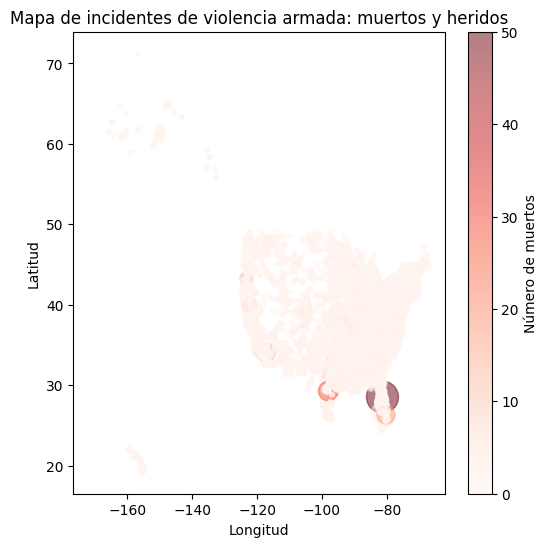

In [11]:
data_geo = df_cleaned[['latitude', 'longitude', 'n_killed', 'n_injured']].dropna()
data_geo = data_geo[data_geo['longitude'] <= 50]

plt.figure(figsize=(6, 6))
plt.scatter(data_geo['longitude'], data_geo['latitude'], alpha=0.5, c=data_geo['n_killed'], cmap='Reds', s=data_geo['n_injured']*10)

plt.title('Mapa de incidentes de violencia armada: muertos y heridos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Número de muertos')
plt.show()

Utilizamos un mapa mas elaborado para una mejor visualizacion

In [ ]:
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)


for idx, row in data_geo.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['n_injured'] * 2,
        color='red' if row['n_killed'] > 0 else 'blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Killed: {row['n_killed']}, Injured: {row['n_injured']}"
    ).add_to(m)

m

Se puede observar una gran tendencia de crimenes armados en florida y en otros focos

# Seleccion de caracteristicas

Primero creare una matriz de correlacion para ver que caracteristicas que podriamos usar para la seleccion.

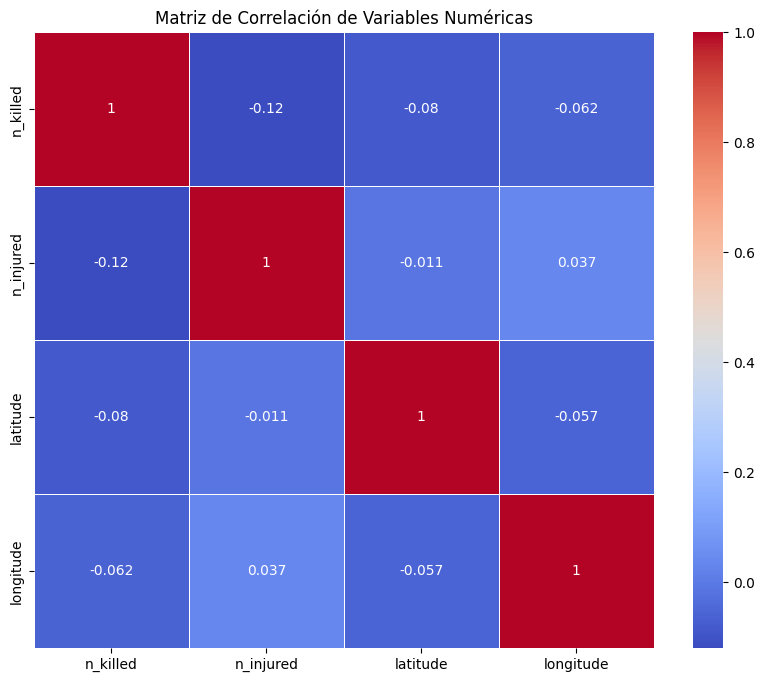

In [13]:

numeric_columns = df_cleaned.select_dtypes(include=[float, int])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

De esto realmente no pude identificar que variable cambiar para poder realizar los siquientes pasos, creo que al limpiar variables deje muy pocas para poder aplicar esto

# Extraccion de caracteristicas

Mis variables de estados y de ciudad podemos representarlos como true or false, para que sean mas faciles de analizar para modelos despues.

In [14]:
df_encoded = pd.get_dummies(df_cleaned, columns=['state', 'city_or_county'], drop_first=True)

df_encoded.head()

,n_killed,n_injured,latitude,longitude,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,...,city_or_county_Zion,city_or_county_Zion (Beach Park),city_or_county_Zion Grove,city_or_county_Zionsville,city_or_county_Zionville,city_or_county_Zumbro Falls,city_or_county_Zumbrota,city_or_county_Zuni (Zuni Pueblo),city_or_county_Zwolle,city_or_county_jefferson parish (county)
0,0,4,40.3467,-79.8559,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,3,33.9090,-118.3330,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,3,41.4455,-82.1377,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,0,39.6518,-104.8020,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2,36.1140,-79.9569,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Otra opcion es usar label encoder, aqui le asignamos un valor numerico a cada caracteristica en vez de manejarlo como trues o falsos

In [15]:
label_encoder = LabelEncoder()

df_cleaned['state_encoded'] = label_encoder.fit_transform(df_cleaned['state'])

df_cleaned[['state', 'state_encoded']].head()

,state,state_encoded
0,Pennsylvania,38
1,California,4
2,Ohio,35
3,Colorado,5
4,North Carolina,33


Otra cosa que se puede realizar es obtener valores derivados por ejemplo los siguientes:

Ratios

In [16]:
epsilon = 1e-6
df_cleaned['injured_to_killed_ratio'] = df_cleaned['n_injured'] / (df_cleaned['n_killed'] + epsilon)

df_cleaned[['n_injured', 'n_killed', 'injured_to_killed_ratio']].head()

,n_injured,n_killed,injured_to_killed_ratio
0,4,0,4.000000e+06
1,3,1,2.999997e+00
2,3,1,2.999997e+00
3,0,4,0.000000e+00
4,2,2,9.999995e-01


Numero total de victimas

In [17]:
df_cleaned['total_victims'] = df_cleaned['n_killed'] + df_cleaned['n_injured']

df_cleaned[['n_killed', 'n_injured', 'total_victims']].head()

,n_killed,n_injured,total_victims
0,0,4,4
1,1,3,4
2,1,3,4
3,4,0,4
4,2,2,4


Tambien es posible aplicar PCA sobre los datos numericos

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.select_dtypes(include=[float, int]))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

df_pca.head()

,PC1,PC2
0,8.011433,-1.409780
1,3.855129,3.365546
2,3.863832,1.962479
3,1.436327,7.774390
4,3.094890,3.841065


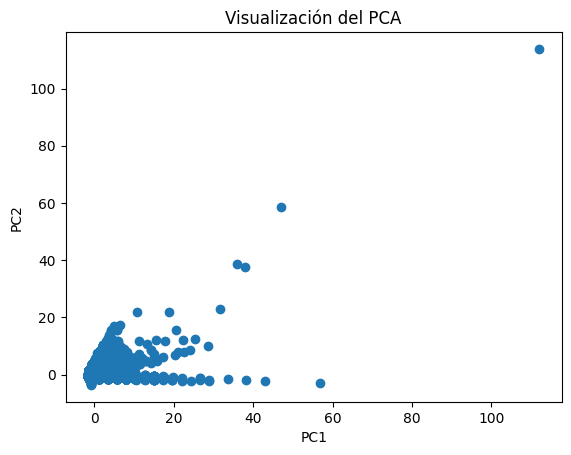

In [19]:
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('Visualización del PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

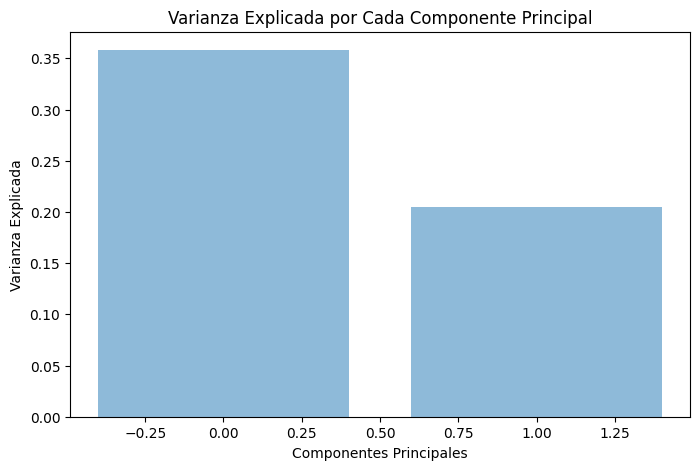

In [20]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.show()

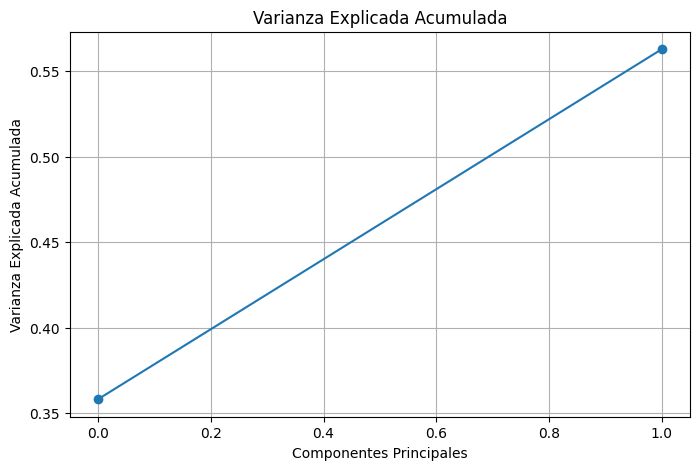

In [21]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(len(cumulative_variance)), cumulative_variance, marker='o')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

In [22]:
print(f"Varianza explicada acumulada con los primeros 2 componentes: {cumulative_variance[1]*100:.2f}%")

Varianza explicada acumulada con los primeros 2 componentes: 56.28%


Estos valores deacuerdo a investigacion de internet deberia esperarse alrededor de un 90% y si no se encuentran talvez las columnas seleccionadas no sean muy relacionadas entre si o hagan falta mas datos

# Conclusión
Estas técnicas me ayudaron a transformar un dataset que era inicialmente complicado en uno más limpio y fácil de manejar. Las visualizaciones y el análisis de correlaciones me dieron una buena comprensión de los datos, mientras que la limpieza y transformación de características aseguraron que el dataset fuera útil para análisis más avanzados. Además, la aplicación de PCA permitió identificar patrones importantes, logrando cumplir con los objetivos planteados en la práctica.